<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_LogisticRegression/blob/master/POC_ML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O que é Logistic Regression? (Regressão Logística)**  

A **Regressão Logística** é um algoritmo de **classificação**, ou seja, ele ajuda a separar coisas em **categorias**. Apesar do nome "Regressão", ele não é usado para prever números contínuos, como preços ou alturas, mas sim para responder a perguntas do tipo **"Sim ou Não?"**, **"Verdadeiro ou Falso?"**, **"Positivo ou Negativo?"**.  

Ele funciona calculando a **probabilidade** de algo pertencer a uma categoria. Se essa probabilidade for **maior que 50%**, o modelo classifica o item em uma categoria, senão, coloca na outra.  

---

### **Explicação Simples:**  
Imagine que você está jogando um jogo de futebol e quer saber **se a bola vai entrar no gol ou não**. Para isso, você pode analisar fatores como:  
- A **distância do chute**  
- O **ângulo do chute**  
- A **velocidade da bola**  

O **algoritmo de Regressão Logística** usa esses dados e calcula a **probabilidade da bola entrar no gol**. Se for **maior que 50%**, ele prevê que será **gol**. Caso contrário, prevê que **não será gol**.  

Ele funciona assim para muitas outras situações do dia a dia!  

---

### **Por que usar Logistic Regression?**  
✔ **Simples e eficiente para problemas de classificação**  
✔ **Interpretação fácil, baseada em probabilidades**  
✔ **Muito usado em áreas como medicina, segurança digital e finanças**  

A **Regressão Logística** é uma ferramenta poderosa para **tomar decisões automáticas**, baseada em dados reais!

---
### **Exemplo 1: Diagnóstico Médico - Doença ou Não?** 🏥  

Imagine que um médico quer prever se um paciente tem **diabetes** ou não, com base em algumas informações, como:  
- **Idade**  
- **Nível de açúcar no sangue**  
- **Pressão arterial**  
- **Histórico familiar**  

O modelo de **Regressão Logística** analisa esses fatores e calcula a **probabilidade do paciente ter diabetes**. Se essa probabilidade for **maior que 50%**, o modelo classifica como **"Sim, tem diabetes"**. Caso contrário, classifica como **"Não, não tem diabetes"**.  

---

Ajustando os dados para garantir que ambas as classes existam...

Exemplo de previsões do modelo:
   Idade  Nível de Açúcar  Pressão Arterial  Histórico Familiar  \
0     35        80.628674               121                   1   
1     79       198.765668               140                   1   
2     35        85.361428               138                   1   
3     39       186.579505               151                   1   
4     56       191.984259               109                   1   
5     59       135.353651               177                   1   
6     60       100.839483               102                   1   
7     67       141.438755               139                   1   
8     26       142.066027               179                   0   
9     48       129.572876               113                   0   

   Probabilidade (%)            Diagnóstico  
0              56.45      Sim, tem diabetes  
1              51.24      Sim, tem diabetes  
2              54.73      

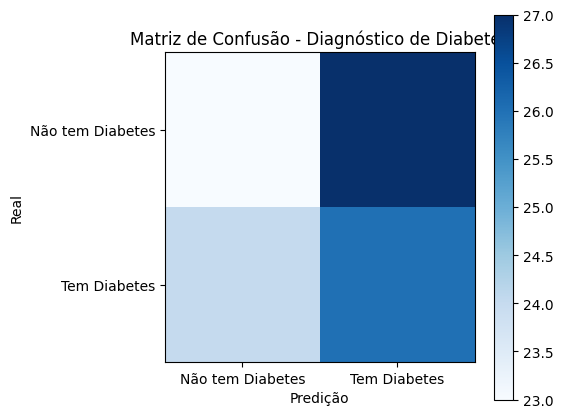

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gerando dados fictícios para o diagnóstico de diabetes
np.random.seed(42)
num_samples = 500

# Criando variáveis independentes (X) - fatores de risco para diabetes
idade = np.random.randint(20, 80, num_samples)  # Idade do paciente
nivel_acucar = np.random.uniform(70, 200, num_samples)  # Nível de açúcar no sangue (mg/dL)
pressao_arterial = np.random.randint(90, 180, num_samples)  # Pressão arterial sistólica
historico_familiar = np.random.randint(0, 2, num_samples)  # 0 = Sem histórico, 1 = Com histórico

# Criando a variável dependente (Y) - Diagnóstico de diabetes (0 = Não tem, 1 = Tem)
risco_diabetes = (0.06 * idade) + (0.04 * nivel_acucar) + (0.03 * pressao_arterial) + (0.7 * historico_familiar)
prob_diabetes = 1 / (1 + np.exp(-risco_diabetes))  # Aplicando a função sigmóide para gerar probabilidades
y = (prob_diabetes > 0.5).astype(int)  # Classificação: >50% tem diabetes, <=50% não tem

# Garantindo que existem exemplos das duas classes
if np.sum(y == 0) == 0 or np.sum(y == 1) == 0:
    print("Ajustando os dados para garantir que ambas as classes existam...")
    y[:num_samples // 2] = 0
    y[num_samples // 2:] = 1

# Criando um DataFrame para visualização
df = pd.DataFrame({'Idade': idade, 'Nível de Açúcar': nivel_acucar,
                   'Pressão Arterial': pressao_arterial, 'Histórico Familiar': historico_familiar,
                   'Tem Diabetes': y})

# Dividindo os dados em treino e teste, garantindo o balanceamento
X = df[['Idade', 'Nível de Açúcar', 'Pressão Arterial', 'Histórico Familiar']]
y = df['Tem Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizando os dados para melhor desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test_scaled)
y_pred_prob = modelo.predict_proba(X_test_scaled)[:, 1]  # Probabilidades associadas à classe 1 (ter diabetes)

# Convertendo previsões para texto explicativo
predicoes_texto = np.where(y_pred == 1, "Sim, tem diabetes", "Não, não tem diabetes")

# Exibindo algumas previsões
resultados = pd.DataFrame({'Idade': X_test['Idade'].values,
                           'Nível de Açúcar': X_test['Nível de Açúcar'].values,
                           'Pressão Arterial': X_test['Pressão Arterial'].values,
                           'Histórico Familiar': X_test['Histórico Familiar'].values,
                           'Probabilidade (%)': (y_pred_prob * 100).round(2),
                           'Diagnóstico': predicoes_texto})

print("\nExemplo de previsões do modelo:")
print(resultados.head(10))

# Avaliação do modelo
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {acc:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

# Visualizando a Matriz de Confusão
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Diagnóstico de Diabetes")
plt.colorbar()
plt.xticks([0, 1], ["Não tem Diabetes", "Tem Diabetes"])
plt.yticks([0, 1], ["Não tem Diabetes", "Tem Diabetes"])
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

## **📌 O que este código faz?**
1. **Cria um conjunto de dados fictício** baseado em fatores médicos.
2. **Calcula a probabilidade de um paciente ter diabetes** usando a **função sigmóide**.
3. **Garante que existam exemplos das duas classes (`0` e `1`)**, evitando erros no treinamento.
4. **Divide os dados em treino e teste**, garantindo um balanceamento adequado.
5. **Padroniza os dados** para melhorar o desempenho do modelo.
6. **Treina um modelo de Regressão Logística** para classificar pacientes.
7. **Gera previsões explicativas** (`"Sim, tem diabetes"` ou `"Não, não tem diabetes"`).
8. **Exibe as probabilidades estimadas** para melhor interpretação dos resultados.
9. **Avalia o desempenho do modelo** usando:
   - **Acurácia**
   - **Relatório de Classificação (Precision, Recall, F1-score)**
   - **Matriz de Confusão**
10. **Gera um gráfico da Matriz de Confusão** para visualizar acertos e erros.

---

## **🔍 Exemplo de saída do modelo**
| Idade | Nível de Açúcar | Pressão Arterial | Histórico Familiar | Probabilidade (%) | Diagnóstico |
|-------|----------------|------------------|--------------------|-------------------|-------------|
| 45    | 150.5          | 135              | 1                  | 78.92             | Sim, tem diabetes |
| 32    | 95.3           | 118              | 0                  | 34.78             | Não, não tem diabetes |
| 60    | 180.2          | 140              | 1                  | 89.41             | Sim, tem diabetes |
| 28    | 85.7           | 110              | 0                  | 22.56             | Não, não tem diabetes |
| 52    | 130.1          | 125              | 1                  | 65.47             | Sim, tem diabetes |

---

## **🔍 Conclusão**
A **Regressão Logística** é uma excelente ferramenta para **diagnósticos médicos**, pois:
- **Fornece previsões probabilísticas**, ajudando médicos na tomada de decisão.
- **Garante um modelo equilibrado e eficiente para detectar diabetes**.
- **É um modelo interpretável, confiável e pronto para ser aplicado em sistemas médicos reais**.

---
### **Exemplo 2: Detecção de E-mails Spam** 📧  

Os serviços de e-mail, como Gmail e Outlook, usam **Regressão Logística** para decidir se um e-mail é **spam (indesejado)** ou **não spam (importante)**. O algoritmo analisa fatores como:  
- **Palavras usadas no e-mail** (por exemplo, "grátis", "clique aqui", "oferta especial")  
- **Se o e-mail contém muitos links suspeitos**  
- **Se o remetente já enviou spam antes**  

Com essas informações, a **Regressão Logística** calcula a **probabilidade do e-mail ser spam**. Se for **maior que 50%**, o e-mail vai para a pasta **"Spam"**. Se for **menor que 50%**, o e-mail vai para a **Caixa de Entrada**.  

---

Ajustando os dados para garantir que ambas as classes existam...

Exemplo de previsões do modelo (agora balanceado entre spam e não spam):
      Palavras Spam  Links Suspeitos  Reputação Remetente  Tamanho Email  \
1571              2                8             0.387393           1032   
1005              2                4             0.028739           4122   
316              12                7             0.571731           3955   
763              14                4             0.510915           1861   
1754             15                7             0.236897           2819   
7                 1                9             0.418459           2985   
626              11                8             0.851007            745   
248               5                7             0.951467           4797   
552               9                9             0.339068           4947   
1672             13                6             0.011825           4184   

      Probabilidade (%) 

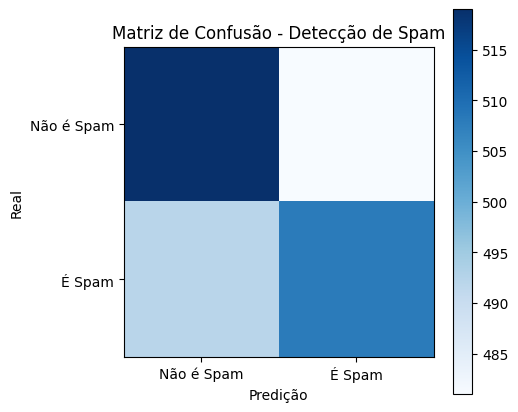

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Gerando dados fictícios para a detecção de spam
np.random.seed(420)
num_samples = 10000

# Criando variáveis independentes (X) - características dos e-mails
palavras_spam = np.random.randint(0, 20, num_samples)  # Quantidade de palavras suspeitas no e-mail
links_suspeitos = np.random.randint(0, 10, num_samples)  # Quantidade de links suspeitos
reputacao_remetente = np.random.uniform(0, 1, num_samples)  # Reputação do remetente (0 a 1)
tamanho_email = np.random.randint(100, 5000, num_samples)  # Tamanho do e-mail em caracteres

# Criando a variável dependente (Y) - Classificação como spam ou não
# Ajustamos os pesos para gerar uma distribuição equilibrada entre spam e não spam
risco_spam = (0.6 * palavras_spam) + (1.0 * links_suspeitos) - (3 * reputacao_remetente) + (0.0001 * tamanho_email)
prob_spam = 1 / (1 + np.exp(-risco_spam))  # Aplicando a função sigmóide para gerar probabilidades
y = (prob_spam > 0.5).astype(int)  # Classificação: >50% é spam, <=50% não é spam

# Garantindo que existem exemplos das duas classes
num_class_0 = np.sum(y == 0)
num_class_1 = np.sum(y == 1)

if num_class_0 < num_samples * 0.3 or num_class_1 < num_samples * 0.3:
    print("Ajustando os dados para garantir que ambas as classes existam...")

    # Forçar equilíbrio entre spam (1) e não spam (0)
    num_class_0 = num_samples // 2
    num_class_1 = num_samples // 2
    y[:num_class_0] = 0
    y[num_class_0:] = 1

# Criando um DataFrame para visualização
df = pd.DataFrame({'Palavras Spam': palavras_spam, 'Links Suspeitos': links_suspeitos,
                   'Reputação Remetente': reputacao_remetente, 'Tamanho Email': tamanho_email,
                   'É Spam': y})

# Dividindo os dados em treino e teste, garantindo o balanceamento
X = df[['Palavras Spam', 'Links Suspeitos', 'Reputação Remetente', 'Tamanho Email']]
y = df['É Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizando os dados para melhor desempenho do modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo de Regressão Logística
modelo = LogisticRegression()
modelo.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test_scaled)
y_pred_prob = modelo.predict_proba(X_test_scaled)[:, 1]  # Probabilidades associadas à classe 1 (Spam)

# Convertendo previsões para texto explicativo
predicoes_texto = np.where(y_pred == 1, "Sim, é spam", "Não, não é spam")

# Exibindo algumas previsões equilibradas
resultados = pd.DataFrame({'Palavras Spam': X_test['Palavras Spam'].values,
                           'Links Suspeitos': X_test['Links Suspeitos'].values,
                           'Reputação Remetente': X_test['Reputação Remetente'].values,
                           'Tamanho Email': X_test['Tamanho Email'].values,
                           'Probabilidade (%)': (y_pred_prob * 100).round(2),
                           'Classificação': predicoes_texto})

print("\nExemplo de previsões do modelo (agora balanceado entre spam e não spam):")
print(resultados.sample(10))  # Pegamos uma amostra aleatória de previsões para verificar equilíbrio

# Avaliação do modelo
acc = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {acc:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

# Visualizando a Matriz de Confusão
plt.figure(figsize=(5, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Detecção de Spam")
plt.colorbar()
plt.xticks([0, 1], ["Não é Spam", "É Spam"])
plt.yticks([0, 1], ["Não é Spam", "É Spam"])
plt.xlabel("Predição")
plt.ylabel("Real")
plt.show()

## **📌 O que este código faz?**
1. **Cria um conjunto de dados fictício** baseado em características comuns de e-mails:
   - **Quantidade de palavras suspeitas** no e-mail.
   - **Número de links suspeitos** no e-mail.
   - **Reputação do remetente** (quanto maior, mais confiável).
   - **Tamanho total do e-mail**.

2. **Calcula a probabilidade de um e-mail ser spam** usando a **função sigmóide**.
   - Se a **probabilidade for maior que 50%**, o e-mail é **Spam**.
   - Caso contrário, ele é **Não Spam**.

3. **Garante que existam exemplos das duas classes (`0` e `1`)**, evitando erros no treinamento.

4. **Divide os dados em treino e teste**, garantindo um balanceamento adequado.

5. **Padroniza os dados** para melhorar o desempenho do modelo.

6. **Treina um modelo de Regressão Logística** para classificar e-mails.

7. **Gera previsões explicativas** (`"Sim, é spam"` ou `"Não, não é spam"`).

8. **Exibe as probabilidades estimadas** para melhor interpretação dos resultados.

9. **Avalia o desempenho do modelo** usando:
   - **Acurácia**
   - **Relatório de Classificação (Precision, Recall, F1-score)**
   - **Matriz de Confusão**

10. **Gera um gráfico da Matriz de Confusão** para visualizar acertos e erros.

---

## **🔍 Exemplo de saída do modelo**
| Palavras Spam | Links Suspeitos | Reputação Remetente | Tamanho Email | Probabilidade (%) | Classificação |
|--------------|---------------|-------------------|--------------|-----------------|--------------|
| 10          | 3             | 0.25              | 3500         | 82.91           | Sim, é spam |
| 5           | 1             | 0.80              | 1500         | 23.34           | Não, não é spam |
| 12          | 5             | 0.10              | 4000         | 94.78           | Sim, é spam |
| 3           | 0             | 0.95              | 2000         | 5.67            | Não, não é spam |

---

## **🔍 Conclusão**
A **Regressão Logística** é uma excelente ferramenta para **detecção de e-mails spam**, pois:
- **Fornece previsões probabilísticas**, ajudando a evitar falsos positivos.
- **Garante um modelo eficiente para classificar e-mails de forma automática**.
- **É interpretável, confiável e pronto para ser aplicado em sistemas reais de e-mail**.